 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

# Set File Paths
whale_returns_data = Path("../pandas_homework_uw_fintech/Resources/whale_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_returns_df = pd.read_csv(whale_returns_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
whale_returns_df.sort_index(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#Determine shape of DataFrame
whale_returns_df.shape

(1060, 4)

In [4]:
#Value count of DataFrame columns
whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Count nulls as a percent of total
whale_returns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [7]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns

# Set File Paths
algo_returns_data = Path("../pandas_homework_uw_fintech/Resources/algo_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
algo_returns_df = pd.read_csv(algo_returns_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
#Determine shape of DataFrame
algo_returns_df.shape

(1241, 2)

In [10]:
#Value count of DataFrame columns
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [11]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Count nulls as a percent of total
algo_returns_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [13]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices

#Set File Path
sp500_history_data = Path("../pandas_homework_uw_fintech/Resources/sp500_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
sp500_history_df = pd.read_csv(sp500_history_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
sp500_history_df.sort_index(inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types

#Remove $ symbol from string
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

#Convert string to float
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [17]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
sp500_daily_returns_df = sp500_daily_returns_df.dropna()
sp500_daily_returns_df.isnull().sum() * 100

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df = sp500_daily_returns_df.rename(columns = {
    'Close': 'S&P 500'
})

sp500_daily_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df], axis = 'columns', join = 'inner')
combined_portfolios_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

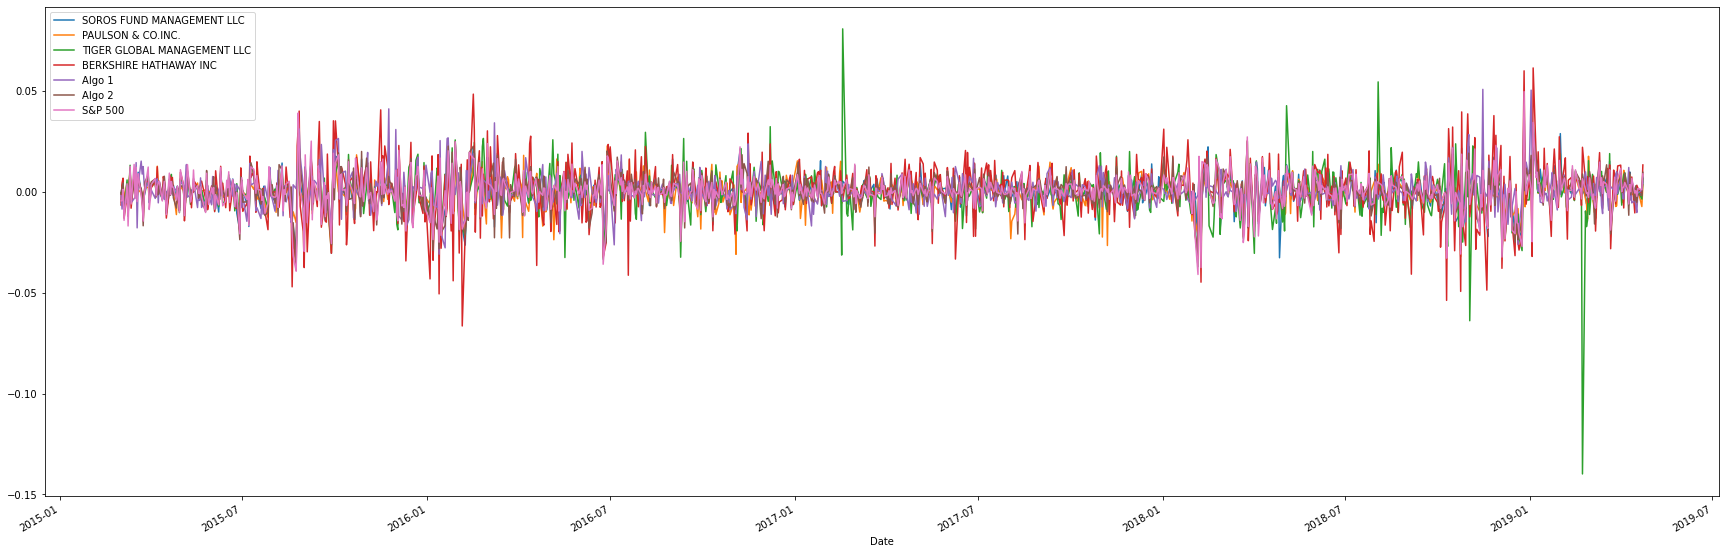

In [21]:
# Plot daily returns of all portfolios
combined_portfolios_returns_df.plot(figsize = (30, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

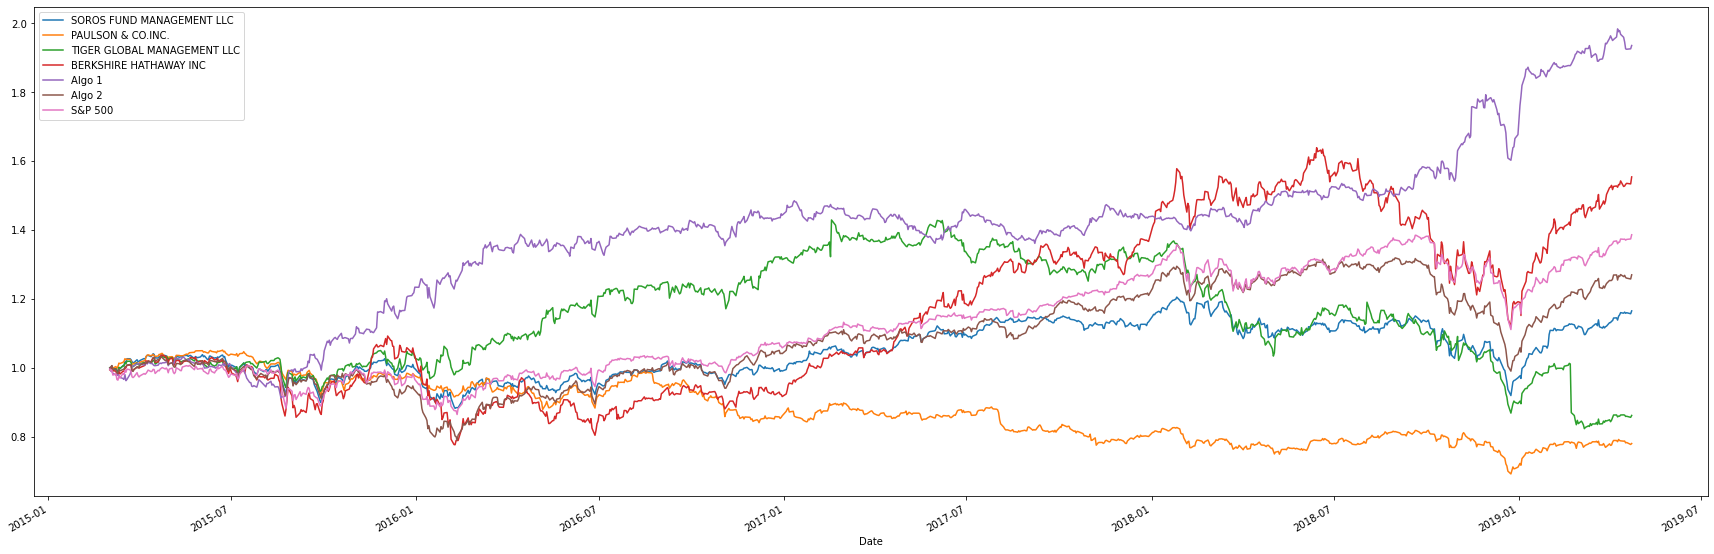

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolios_returns_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (30, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

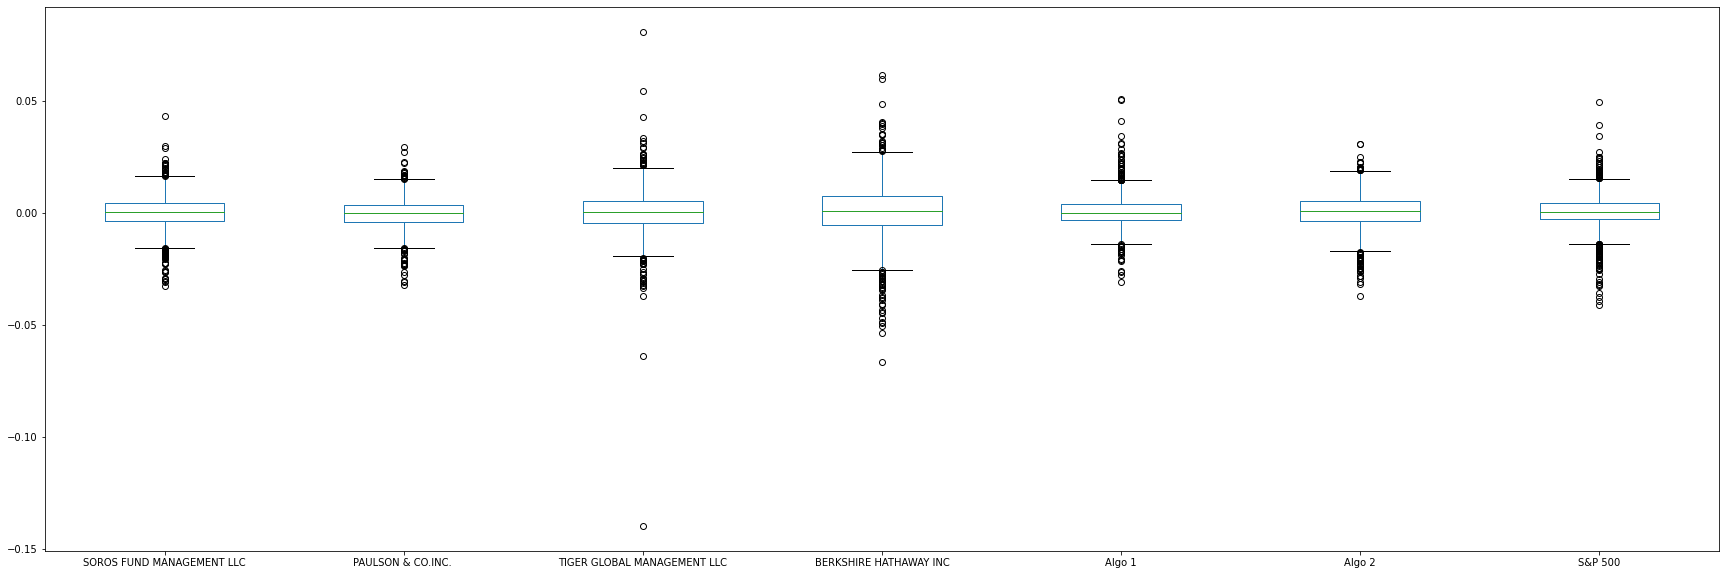

In [23]:
# Box plot to visually show risk
combined_portfolios_returns_df.plot.box(figsize = (30, 10))

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
daily_std_berkshire = combined_portfolios_returns_df['BERKSHIRE HATHAWAY INC'].std()
daily_std_berkshire

daily_std_tiger = combined_portfolios_returns_df['TIGER GLOBAL MANAGEMENT LLC'].std()
daily_std_tiger

daily_std_paulson = combined_portfolios_returns_df['PAULSON & CO.INC. '].std()
daily_std_paulson

daily_std_soros = combined_portfolios_returns_df['SOROS FUND MANAGEMENT LLC'].std()
daily_std_soros

daily_std_algo_1 = combined_portfolios_returns_df['Algo 1'].std()
daily_std_algo_1

daily_std_algo_2 = combined_portfolios_returns_df['Algo 2'].std()
daily_std_algo_2

0.008342274600964455

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = combined_portfolios_returns_df['S&P 500'].std()
daily_std_sp500
# Determine which portfolios are riskier than the S&P 500
daily_std_combined = combined_portfolios_returns_df.std()
daily_std_combined = daily_std_combined.sort_values(ascending = False)
daily_std_combined.head(10)

#Berkshire Hathaway Inc and Tiger Global Management portfolios are riskier than the S&P 500

#combined_portfolios_returns_df.plot.hist(stacked = True, bins = 100)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined = daily_std_combined * np.sqrt(252)
annualized_std_combined = annualized_std_combined.sort_values(ascending = True)
annualized_std_combined.head()

PAULSON & CO.INC.            0.111488
Algo 1                       0.120967
SOROS FUND MANAGEMENT LLC    0.125335
Algo 2                       0.132430
S&P 500                      0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

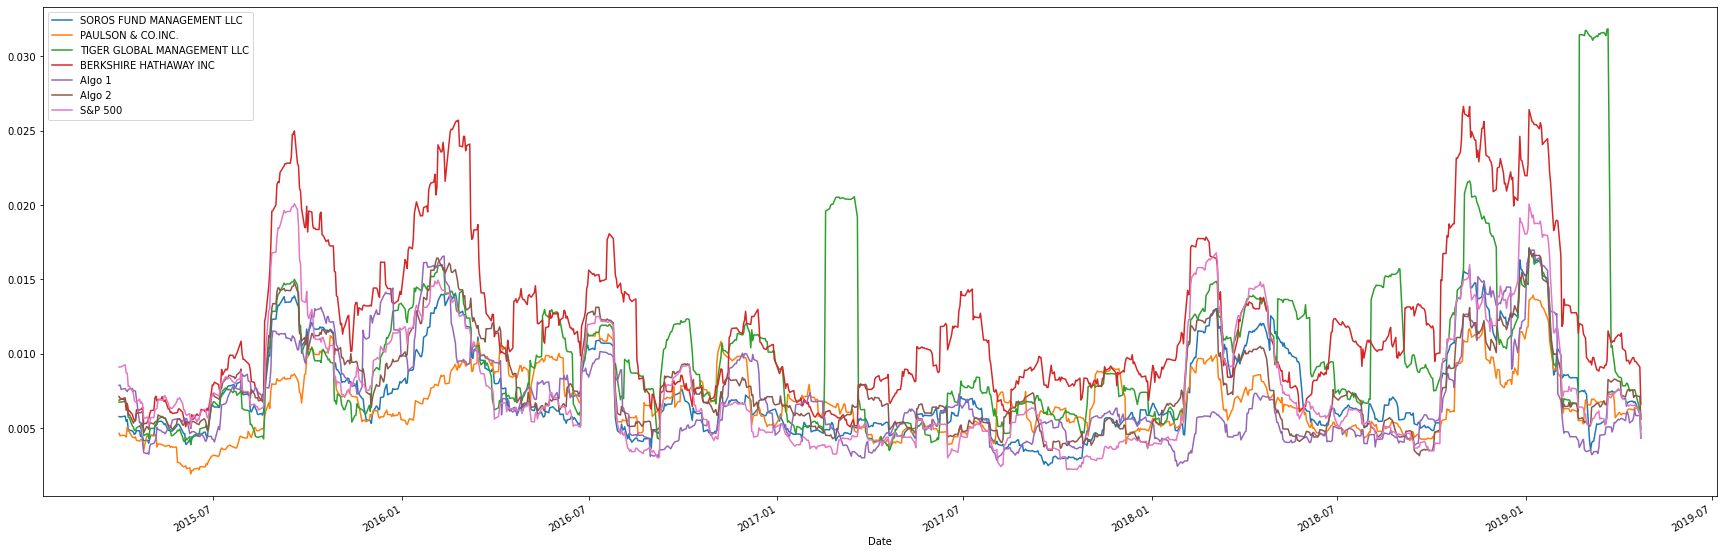

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_portfolios_returns_df.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize = (30, 10))

### Calculate and plot the correlation

<AxesSubplot:>

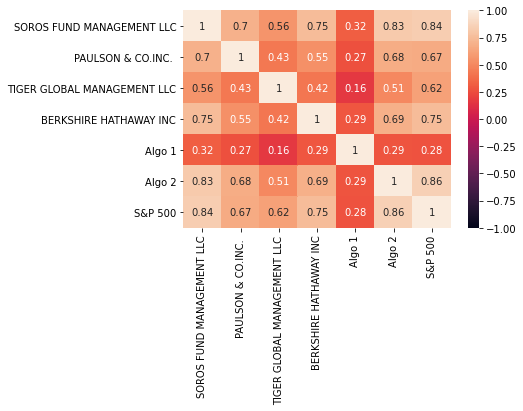

In [28]:
# Calculate the correlation
correlation_combined_portfolios = combined_portfolios_returns_df.corr()
correlation_combined_portfolios
# Display de correlation matrix
sns.heatmap(correlation_combined_portfolios, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

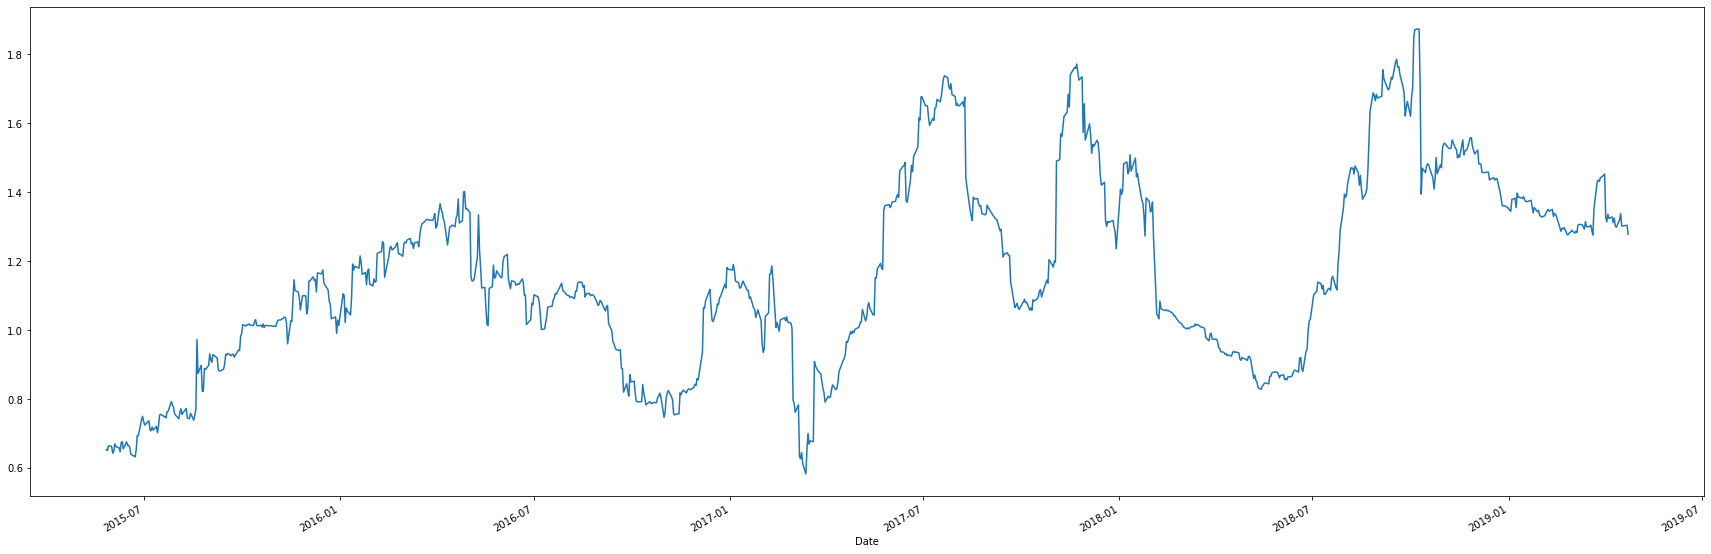

In [29]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_portfolios_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_portfolios_returns_df['S&P 500'])
berkshire_covariance
# Calculate variance of S&P 500
sp500_variance = combined_portfolios_returns_df['S&P 500'].rolling(window = 60).var()
sp500_variance

# Computing beta
berkshire_beta = berkshire_covariance / sp500_variance
berkshire_beta

# Plot beta trend
berkshire_beta.plot(figsize = (30, 10))

#sns.lmplot(x = 'S&P 500', y = 'BERKSHIRE HATHAWAY INC', data = combined_portfolios_returns_df, aspect = 1.5, fit_reg = True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

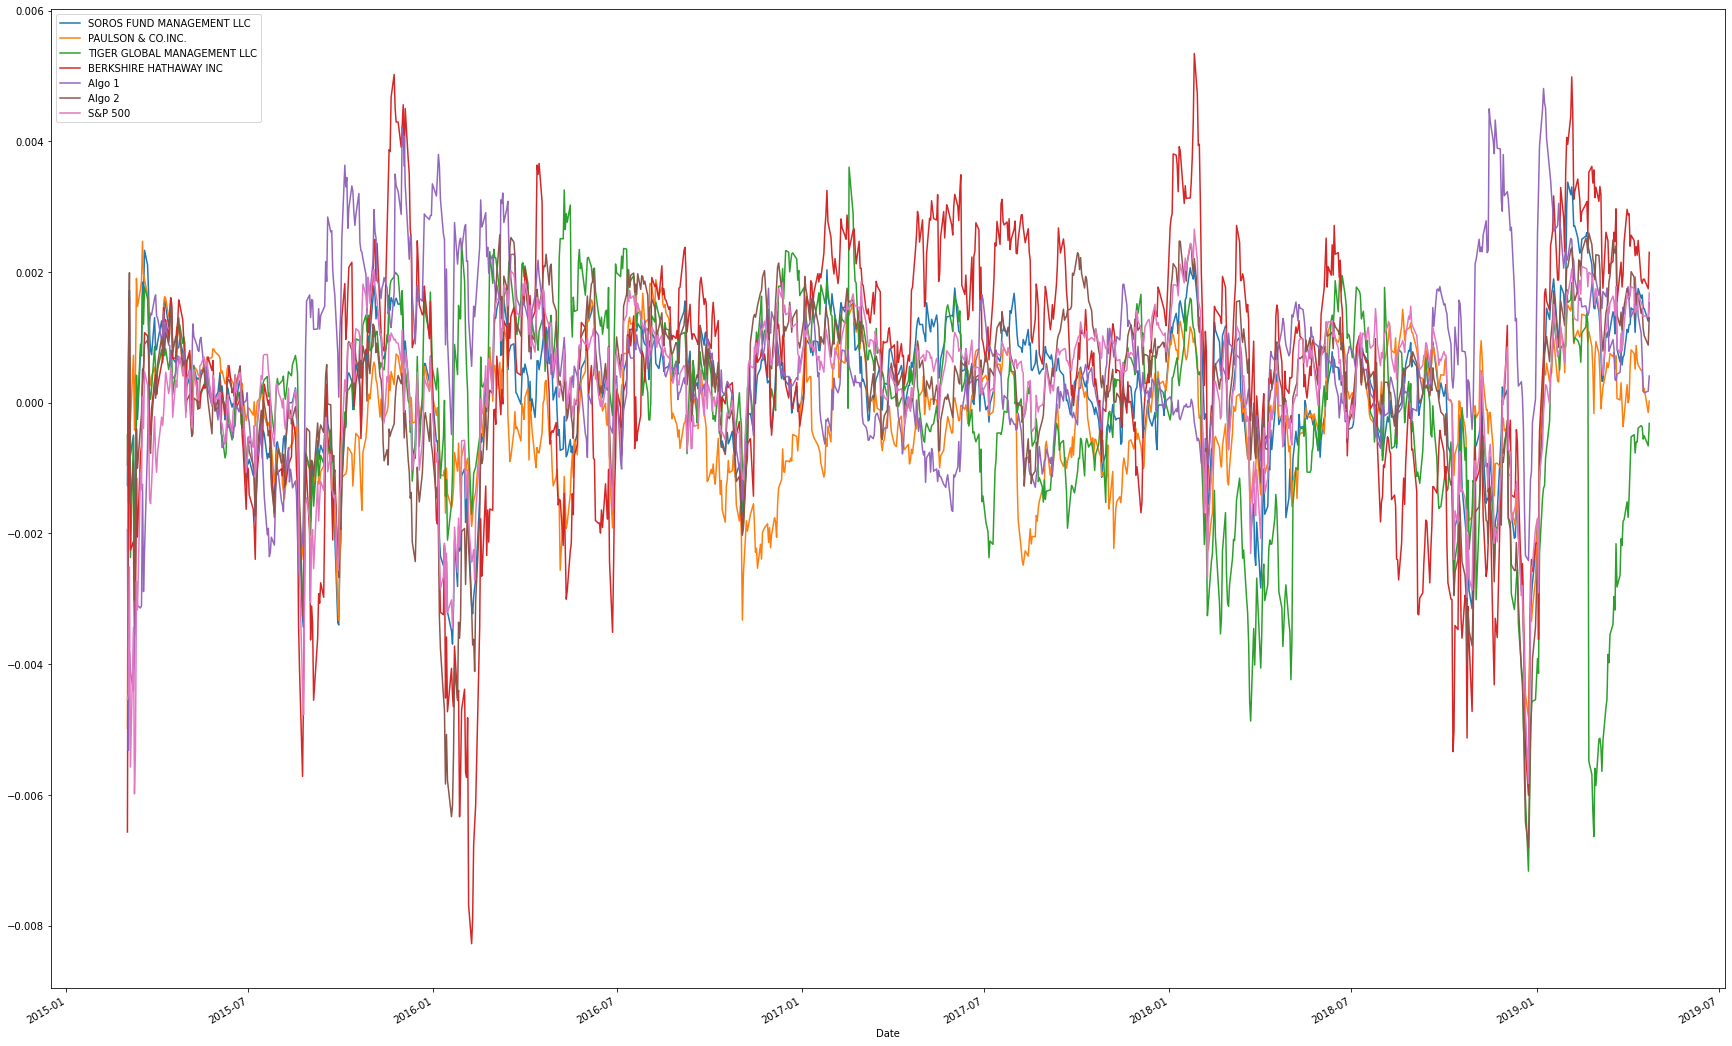

In [30]:
# Use `ewm` to calculate the rolling window
rolling_mean_halflife_21 = combined_portfolios_returns_df.ewm(halflife='21 days', times = combined_portfolios_returns_df.index).mean()
rolling_mean_halflife_21.plot(figsize = (30, 20))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_returns_df.mean() * 252) / (combined_portfolios_returns_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending = False)
sharpe_ratios

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

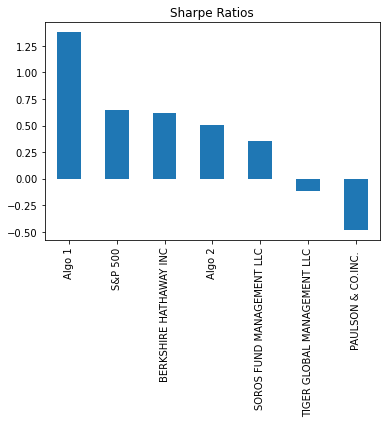

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms both S&P 500 and the "Whale" portfolios, whereas Algo 2 does not. Algo 2 has a higher Sharpe ratio than Soros, Tiger and Paulson, but not S&P 500 and Berkshire.

<AxesSubplot:xlabel='Date'>

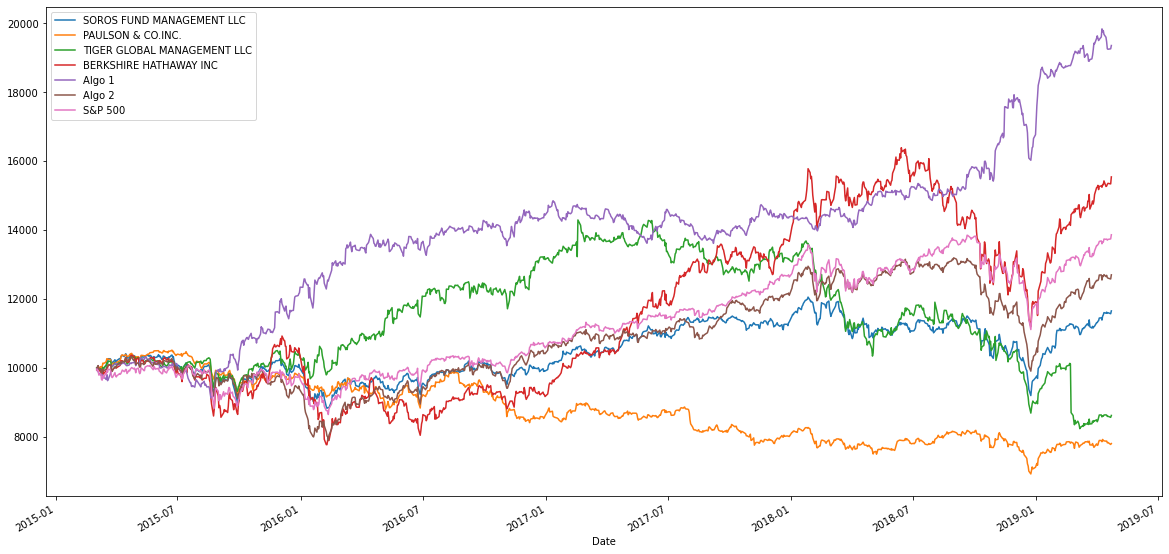

In [33]:
initial_investment = 10000

cumulative_returns = (1 + combined_portfolios_returns_df).cumprod()
cumulative_profits = (initial_investment * cumulative_returns)
cumulative_profits.plot(figsize=(20,10))

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [34]:
# Reading data from 1st stock
GOOG_data = Path ("../pandas_homework_uw_fintech/Resources/goog_historical.csv")

goog_df = pd.read_csv(GOOG_data, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates =True)
goog_df.sort_index(inplace = True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [35]:
# Reading data from 2nd stock
AAPL_data = Path ("../pandas_homework_uw_fintech/Resources/aapl_historical.csv")

aapl_df = pd.read_csv(AAPL_data, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
aapl_df.sort_index(inplace = True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [36]:
# Reading data from 3rd stock
COST_data = Path ("../pandas_homework_uw_fintech/Resources/cost_historical.csv")

cost_df = pd.read_csv(COST_data, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
cost_df.sort_index(inplace = True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [37]:
# Combine all stocks in a single DataFrame
combined_custom_portfolio_df = pd.concat([goog_df, aapl_df, cost_df], axis = 'rows', join = 'inner')
combined_custom_portfolio_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [38]:
# Reset Date index
combined_custom_portfolio_df = combined_custom_portfolio_df.reset_index()
combined_custom_portfolio_df.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [39]:
# Reorganize portfolio data by having a column per symbol
combined_custom_portfolio_df = combined_custom_portfolio_df.pivot(values = 'NOCP', index = 'Trade DATE', columns = 'Symbol')
combined_custom_portfolio_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [40]:
# Calculate daily returns
combined_custom_returns = combined_custom_portfolio_df.pct_change()

# Drop NAs
combined_custom_returns = combined_custom_returns.dropna()

# Display sample data
combined_custom_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = combined_custom_returns.dot(weights)
# Display sample data
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_returns_df = pd.concat([combined_portfolios_returns_df, custom_portfolio_returns], axis = 'columns', join = 'inner')
combined_portfolios_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [43]:
#Rename Custom Portfolio Returns Column
combined_portfolios_returns_df = combined_portfolios_returns_df.rename(columns = {
    0: "Custom 1"
})
combined_portfolios_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom 1
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_returns_df = combined_portfolios_returns_df.dropna()
combined_portfolios_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom 1
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the daily `std`
daily_std_combined = combined_portfolios_returns_df.std()
daily_std_combined = daily_std_combined.sort_values(ascending = False)
daily_std_combined.head(10)

BERKSHIRE HATHAWAY INC         0.015569
TIGER GLOBAL MANAGEMENT LLC    0.014648
Custom 1                       0.013323
S&P 500                        0.009578
SOROS FUND MANAGEMENT LLC      0.009240
Algo 2                         0.008791
Algo 1                         0.008423
PAULSON & CO.INC.              0.007353
dtype: float64

In [46]:
# Calculate the annualized `std`
annualized_std_combined = daily_std_combined * np.sqrt(252)
annualized_std_combined = annualized_std_combined.sort_values(ascending = True)
annualized_std_combined.head(10)

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P 500                        0.152054
Custom 1                       0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

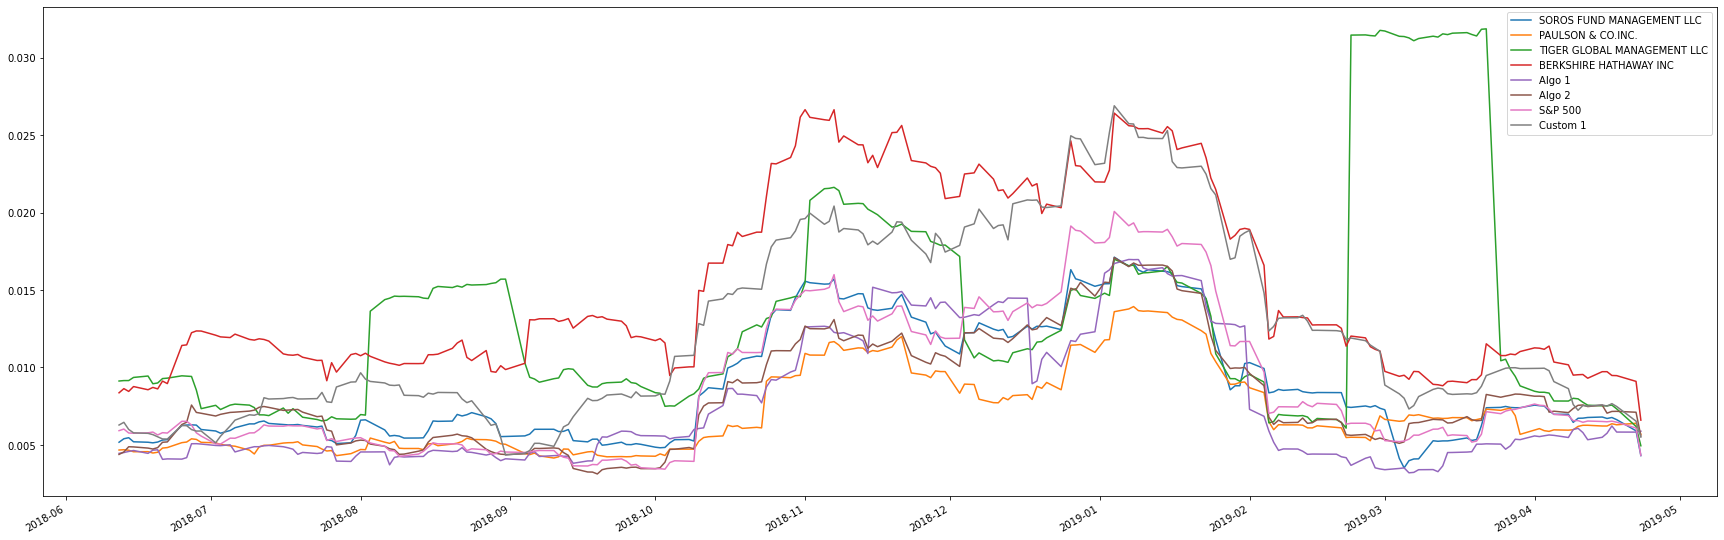

In [47]:
# Calculate rolling standard deviation
rolling_std_21 = combined_portfolios_returns_df.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std_21.plot(figsize = (30, 10))

### Calculate and plot the correlation

<AxesSubplot:>

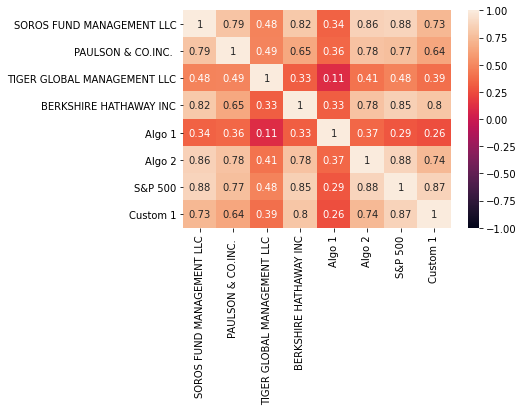

In [48]:
# Calculate and plot the correlation
correlation_combined_portfolios = combined_portfolios_returns_df.corr()
correlation_combined_portfolios
# Display de correlation matrix
sns.heatmap(correlation_combined_portfolios, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

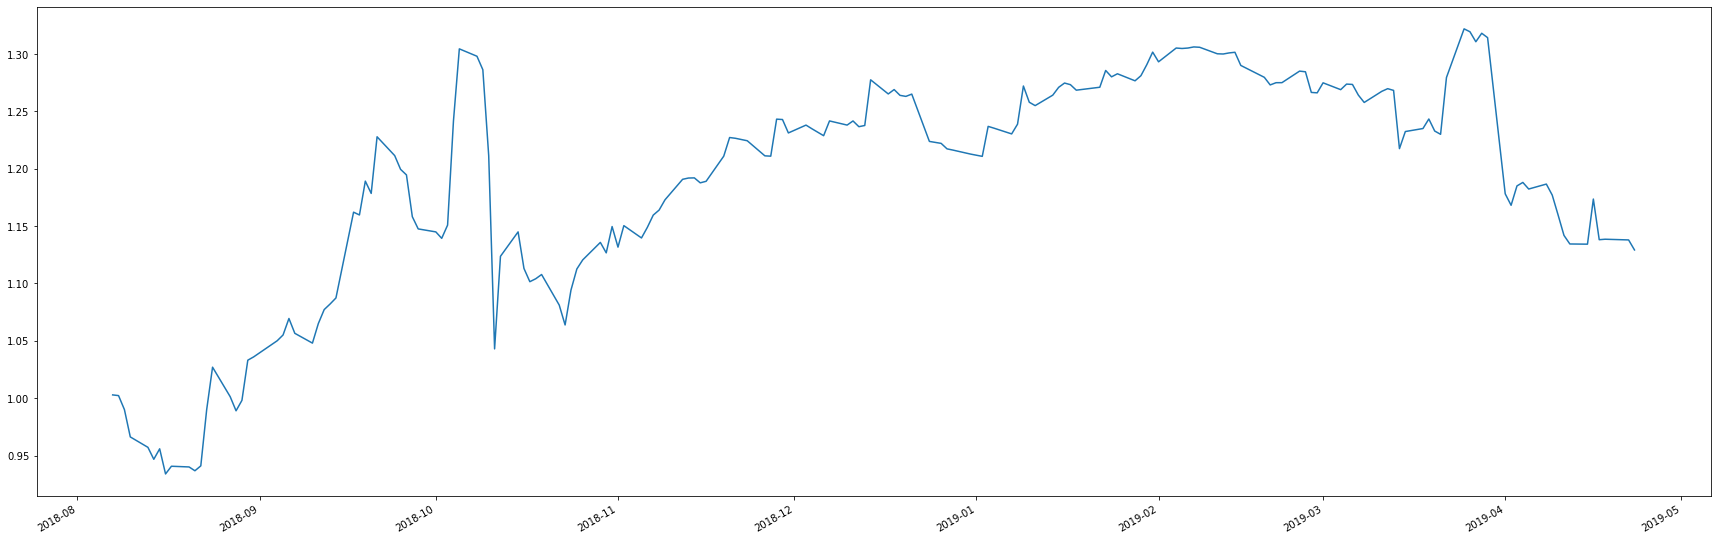

In [49]:
# Calculate and plot Beta

# Calculate covariance of Custom Portfolio
custom_1_covariance = combined_portfolios_returns_df['Custom 1'].rolling(window = 60).cov(combined_portfolios_returns_df['S&P 500'])
custom_1_covariance
# Calculate variance of S&P 500
sp500_variance = combined_portfolios_returns_df['S&P 500'].rolling(window = 60).var()
sp500_variance

# Computing beta
custom_1_beta = custom_1_covariance / sp500_variance
custom_1_beta

# Plot beta trend
custom_1_beta.plot(figsize = (30, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_portfolios_returns_df.mean() * 252) / (combined_portfolios_returns_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending = False)
sharpe_ratios

Algo 1                         2.035665
Custom 1                       0.933123
S&P 500                        0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

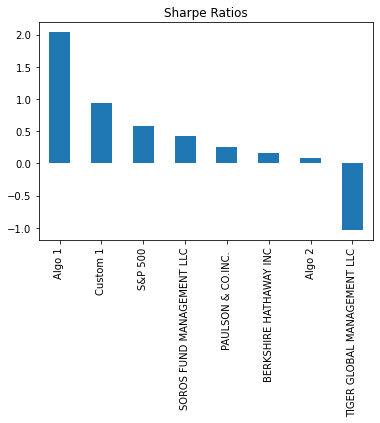

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

Custom Portfolio outperforms both S&P 500 and the "Whale" portfolios, but not Algo 1.

<AxesSubplot:>

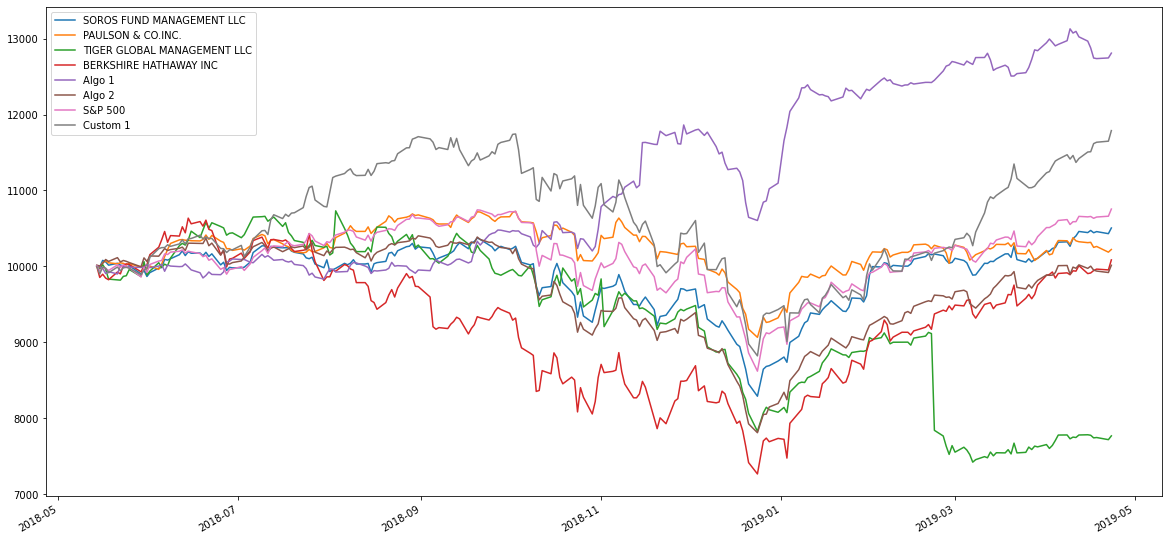

In [52]:
initial_investment = 10000

cumulative_returns = (1 + combined_portfolios_returns_df).cumprod()
cumulative_profits = (initial_investment * cumulative_returns)
cumulative_profits.plot(figsize=(20,10))